# Aim
to predict the total charges based on given features

https://www.kaggle.com/code/kkhandekar/passive-aggressive-regression/notebook \
https://www.kaggle.com/code/snipss2/medical-cost-prediction

## set up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("medical_insurance.csv")

## take a look at the data

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(2772, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

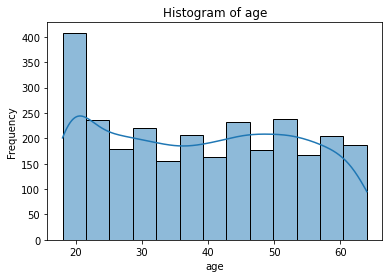

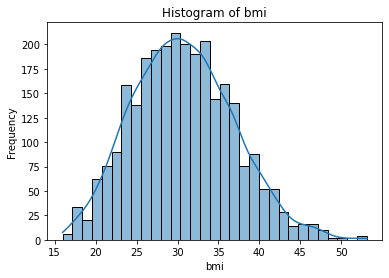

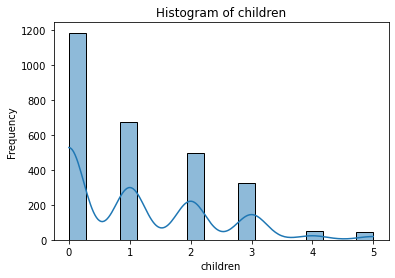

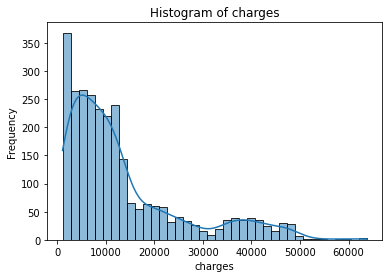

In [9]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Plot histogram for the column using Seaborn
        plt.figure()
        sns.histplot(df[column], kde=True).set_title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

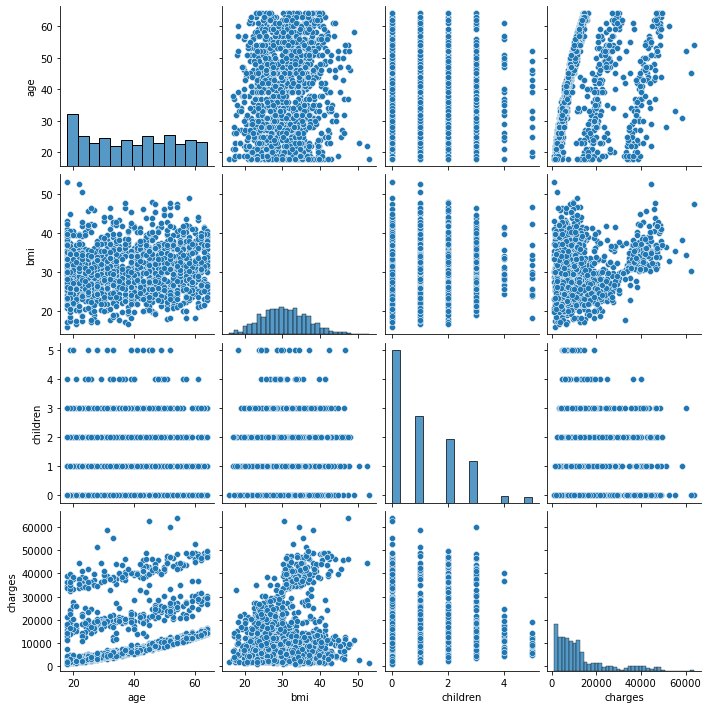

In [10]:
sns.pairplot(df)

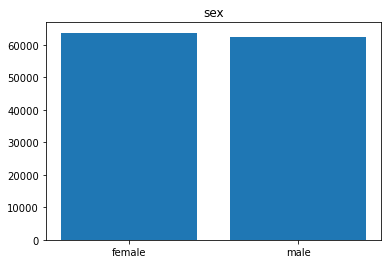

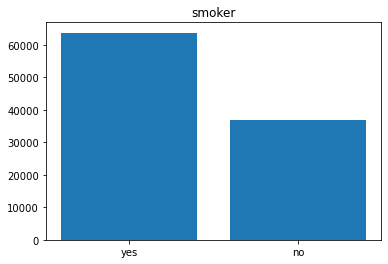

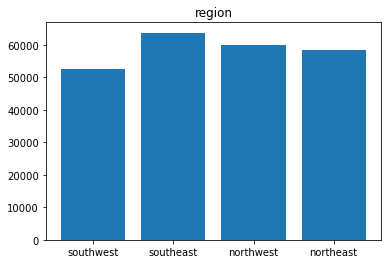

In [11]:
for column in df.columns:
    if pd.api.types.is_string_dtype(df[column]):
        plt.bar(df[column], df["charges"])
        plt.title(column)
        plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

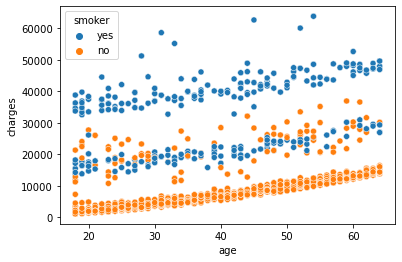

In [12]:
sns.scatterplot(x = 'age', y = 'charges', hue='smoker', data = df)

<AxesSubplot:>

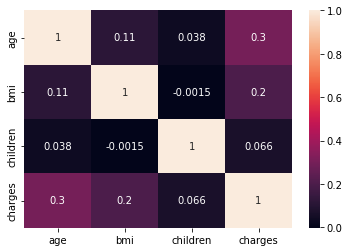

In [13]:
sns.heatmap(df.corr(), annot = True)

## clean the data

* no missing values

* format decimals

In [14]:
df['bmi'] = df['bmi'].apply(lambda x: round(x,2))
df['charges'] = df['charges'].apply(lambda x: round(x,2))

* duplicate columns

In [15]:
df1 = df.loc[~df.duplicated(subset = ['charges'])] \
    .reset_index(drop = True)

In [16]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1332,50,male,30.97,3,no,northwest,10600.55
1333,18,female,31.92,0,no,northeast,2205.98
1334,18,female,36.85,0,no,southeast,1629.83
1335,21,female,25.80,0,no,southwest,2007.94


## train - test split

In [17]:
# to train test _ split 
# then do the feature selection

### way 1 - normal split

In [18]:
from sklearn.model_selection import train_test_split

X = df1.drop('charges', axis = 1)
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


### way 2 - stratified shuffle

## Feature Enginnering

- One Hot Encode
- Ordinal Encode
- Standard Scale

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
num_list = ['age', 'bmi', 'children']
num_transformer = StandardScaler()

cat_list = ['sex', 'smoker', 'region']
cat_transformer = OneHotEncoder()

transformer = ColumnTransformer([
        ('num', num_transformer, num_list),
        ('cat', cat_transformer, cat_list)
    ])

In [22]:
X_train_trans = transformer.fit_transform(X_train)
X_train_trans.shape

(1069, 11)

In [25]:
X_test_trans = transformer.transform(X_test)
X_test_trans.shape

(268, 11)

## Model Implementation

- fit the model on train data
- predict y based on test data
- compare y_predict and y_test

In [24]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [26]:
LR_model.fit(X_train_trans, y_train)
y_pred = LR_model.predict(X_test_trans)

In [29]:
from sklearn.metrics import mean_squared_error

model_RMSE = mean_squared_error(y_pred, y_test, squared = False)
model_RMSE

5956.448936749951

### save the model

In [31]:
import joblib

joblib.dump(LR_model, "LR_MI_predictor")
print('Model has been saved.')

Model has been saved.
